# <p style="text-align: center;"> Social Butterfly - Umbrella Academy - Collecting Metadata</p>

![title](Skunkworks.png)

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>
- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
   - ### 1.2 [Importing Libraries](#importing_libraries)
   - ### 1.3 [Data Collection Functions](#functions)
       - ### 1.3.1 [Function for taking the user input](#user_input)
       - ### 1.3.2 [Function for saving the scraped tweets](#saving_scraped_tweets)
       - ### 1.3.3 [Function for extracting entities](#extracting_entities)
       - ### 1.3.4 [Generating a CSV for tweets](#generating_csv)
   - ### 1.4 [Dataset Summary](#dataset_summary)
   - ### 1.5 [Dataset Cleaning](#dataset_cleaning)
       - ### 1.5.1 [Functions to clean data](#functions_for_cleaning)
- ## 2. [Collecting Hashtags](#collecting_hashtags)
   - ### 2.1 [Most occuring Hashtags](#most_occuring_hashtag)
   - ### 2.2 [Advertools](#advertools)
- ## 3. [Conclusion](#Conclusion)
- ## 4. [Contribution](#Contribution)
- ## 5. [Citation](#Citation)
- ## 6. [License](#License)

# <p style="text-align: center;"> 1.0 Introduction </p> <a id='Introduction'></a>

Social Butterfly is a social media engagement software project which is a part of the NEU AI Skunkworks Project team. We propose to create a software that performs the task of content optimization and then publishes the same optimized content on one or more social media platform (viz. Twitter, Skunkworks, Instagram etc.). Publishing content on social media is the fastest way to reach audience so the content that should be posted and the timing at which it should be posted is of prime importance. Finding new content is incredibly hard, we are also proposing to employ machine learning methods to create new content after training the models on the given data. These are the two major tasks that we propose to tackle in our Project. 

# 1.1 Abstract <a id='abstract'></a>

In this notebook we tackle with the task of Metadata collection. We chose to collect data from twitter as it is easy to scrape data from twitter with the help of Python library like Tweepy. We save the scraped tweets in json file and then convert it to a csv file. This csv file is then loaded as a pandas dataframe, and we extract hashtags from the tweets. Then we plot these hashtags with their count to see their frequency of occurence. This gives us some good idea as to which hashtags should we use while scraping data from twitter.

[Back to top](#Introduction)

# 1.2 Importing Libraries <a id='importing_libraries'></a>

In this step, we import libraries that we need for this notebook. A few basic libraries like numpy, pandas, matplotlib etc are used. Other libraries like tweepy, json, csv are used to collect data from twitter and save them as a json and csv file. Advertool helps us analyze our metadata and nltk helps us with the natural language processing.

[Back to top](#Introduction)

In [5]:
import json
import tweepy
import csv

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize 

%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt

import re

import nltk
from nltk.corpus import stopwords

import string
import advertools as adv

import warnings; warnings.simplefilter('ignore')

twitter_cred = dict()

twitter_cred['CONSUMER_KEY'] = '17XHiftb4Iu5hVAIh4NacWj9S'
twitter_cred['CONSUMER_SECRET'] = '8xAXhFsfnkiFjSFO5THqRO5J8x8lKSzC9J2GNPUSY7ZPb5z6Qv'
twitter_cred['ACCESS_KEY'] = '1392379572-FInzXaziEqyNCGc8jqtU9LwnFFlHYRpjoihZpiX'
twitter_cred['ACCESS_SECRET'] = 'JBDveSiUU6aXpwx8QkxYhXloDr9DyHn7ocqrqgWqwqctw'

In [6]:
# Saving the Twitter Credentials to a json file
with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [7]:
# Opening the Twitter Credentials saved in a json file
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

    
# Create the api endpoint
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

# 1.3 Data Collection Functions <a id='functions'></a>
We need to collect metadata, so we need to define a few things at first. We will ask user for number of tweets and the hastags that they want to extract data on. This will give us some basic idea as to what are the hashtags that are relevant alongside the hashtags that we feed it. 

[Back to top](#Introduction)

### 1.3.1 Function for taking the user input <a id='user_input'></a>

The hashtags that we give as input here are of prime importance as our whole project's domain is going to based on these hashtags. Ideally it is recommended to scrape as many tweets as possible as that'll give us a more comprehensive understanding about the data.

Here we are scraping for 3 Hashtags(AI, ML and DataScience) for 2500 tweets each.

[Back to top](#functions)

In [3]:
def tweet_scrapped():
    maximum_number_of_tweets_to_be_extracted = \
    tweet_number=int(input('Enter the number of tweets that you want to extract- '))
    return tweet_number
def Hashtag_used():
    hashtag=str(input('Enter the hashtag you want to scrape- '))
    return hashtag

### 1.3.2 Function for saving the scraped tweets <a id='saving_scraped_tweets'></a>
After scraping the tweets, we would be saving them in a json file as it is the most compatible to extract information from and to save information to for tweets. 
in a json file

[Back to top](#functions)

In [9]:
def scrap_tweets(hashtag,tweet_number):
    all_the_tweets = [] 
    with open('output_json.json', 'w') as outfile:
        
        for tweet in tweepy.Cursor(api.search, q='#' + hashtag,rpp=400, tweet_mode='extended').items(tweet_number):
             if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
                json.dump(tweet._json, outfile, indent=2) 
                outfile.write('\n')
                all_the_tweets.append(tweet)
               
    print ('Extracted ' + str(tweet_number) + ' tweets with hashtag #' + hashtag)
    
    return all_the_tweets

### 1.3.3 Function for extracting entities <a id='extracting_entities'></a>

After scraping the tweets, we will select only the entities that we need for metadata collection. We will not be using the remaining entities in this section.

[Back to top](#functions)

In [4]:
def out_tweets(tweets_scrapped):
    
    outtweets = [[tweet.id_str, tweet.full_text.encode('utf-8').decode("utf-8"),tweet.user.screen_name, tweet.entities.get('hashtags')] for tweet in tweets_scrapped]
    return outtweets      

### 1.3.4 Generating a CSV for tweets <a id='generating_csv'></a>
Now that we have a json file of our tweets with all the entities, we will create a few csv files, so that it can be easily loaded as a Pandas Dataframe.

[Back to top](#functions)

In [8]:
def csv_tweets(outtweets,hashtag):
    tweet_csv_name=' tweets with hashtag #' + hashtag+'.csv'
    with open(tweet_csv_name, 'w', encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'text', 'screen_name', 'Hashtags'])
        writer.writerows(outtweets)

In [9]:
tweet_number=int(tweet_scrapped())

Enter the number of tweets that you want to extract- 2500


In [24]:
hashtag=str(Hashtag_used())

Enter the hashtag you want to scrape- DataScience


In [25]:
tweets_scrapped=scrap_tweets(hashtag,tweet_number)

Extracted 2500 tweets with hashtag #DataScience


In [26]:
outtweets=out_tweets(tweets_scrapped)

In [27]:
csv_tweets(outtweets,hashtag)

### Converting the csv files to dataframes 

We are doing this for three hashtags here:- AI, ML and DataScience

In [9]:
def dataframe(hashtag):
    tweet_csv_name=' tweets with hashtag #' + hashtag+'.csv'
    dataset=pd.read_csv(tweet_csv_name,encoding="ISO-8859-1")
    return dataset

# 1.4 Dataset Summary <a id='dataset_summary'></a>
Since this dataset is scraped from twitter, it is bound to have some irregular values. In this step we check the summary of the dataset by checking the first 5 columns of the scraped data, checking the data types of the columns and checking the mathematical summary of the dataset

[Back to top](#Introduction)

In [10]:
dataset_1=dataframe('AI') #Dataset for #AI
dataset_1.head()

,id,created_at,text,user,screen_name,friends_count,followers_count,retweet_count,favorite_count,Hashtags
0,1118678264581505024,2019-04-18 00:50:56,#AI #education https://t.co/nvh7t1jMjf,Carol Tonhauser,cmt1,3101,4656,0,0,"[{'text': 'AI', 'indices': [0, 3]}, {'text': '..."
1,1118678197829361664,2019-04-18 00:50:41,"RT DeepLearn007 ""RT DeepLearn007: An Excellent...",Mahavira Paris,ParisMahavira,132,175,0,0,"[{'text': 'DeepLearning', 'indices': [70, 83]}..."
2,1118678194712915969,2019-04-18 00:50:40,"RT DeepLearn007 ""RT DeepLearn007: Top #AI Infl...",Mahavira Paris,ParisMahavira,132,175,0,0,"[{'text': 'AI', 'indices': [38, 41]}, {'text':..."
3,1118678131743711233,2019-04-18 00:50:25,ðåãæ¹æ¹é©ãæè­ããæ¥ãã¬æ...,Screens,screens_lab,10,230,0,0,"[{'text': 'æ¥æ¬ãã¬ã', 'indices': [103, ..."
4,1118677974574825472,2019-04-18 00:49:47,Check out todayâs news on @GlasswingVC portf...,Katharine Panessidi,KatPan,2231,1384,0,0,"[{'text': 'AI', 'indices': [194, 197]}, {'text..."


In [11]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
id                 889 non-null int64
created_at         889 non-null object
text               889 non-null object
user               889 non-null object
screen_name        889 non-null object
friends_count      889 non-null int64
followers_count    889 non-null int64
retweet_count      889 non-null int64
favorite_count     889 non-null int64
Hashtags           889 non-null object
dtypes: int64(5), object(5)
memory usage: 69.5+ KB


In [12]:
dataset_1.describe()

,id,friends_count,followers_count,retweet_count,favorite_count
count,8.890000e+02,889.000000,8.890000e+02,889.000000,889.000000
mean,1.118652e+18,6285.381327,2.549689e+04,0.734533,0.947132
std,1.375920e+13,23537.737915,2.919395e+05,1.783732,4.022532
min,1.118632e+18,0.000000,3.000000e+00,0.000000,0.000000
25%,1.118639e+18,315.000000,3.960000e+02,0.000000,0.000000
50%,1.118651e+18,1495.000000,2.470000e+03,0.000000,0.000000
75%,1.118665e+18,4896.000000,7.304000e+03,1.000000,1.000000
max,1.118678e+18,227041.000000,8.545650e+06,21.000000,77.000000


In [13]:
dataset_2=dataframe('ML') #Dataset for #ML
dataset_2.head()

,id,created_at,text,user,screen_name,friends_count,followers_count,retweet_count,favorite_count,Hashtags
0,1118676868876705793,2019-04-18 00:45:24,Learn SSRS SQL Reporting &amp; #BusinessIntell...,Jamil Ahmed,ahmedjr_16,27347,25630,0,0,"[{'text': 'BusinessIntelligence', 'indices': [..."
1,1118676113859981312,2019-04-18 00:42:24,Thanks in advance for not freezing my credit c...,Brittany Chow,bchow03,148,110,1,4,"[{'text': 'AI', 'indices': [110, 113]}, {'text..."
2,1118673101082857473,2019-04-18 00:30:25,Listen to the LIVE panel discussion on the lat...,Eddy Travels,eddytravels,130,51,3,4,"[{'text': 'AI', 'indices': [115, 118]}, {'text..."
3,1118671829885841415,2019-04-18 00:25:22,#SAPPHIRENOW #musician #rocknroll #innovation ...,James J. Piacentino,jamespiacentino,78,167,0,0,"[{'text': 'SAPPHIRENOW', 'indices': [0, 12]}, ..."
4,1118670613730615297,2019-04-18 00:20:32,Agree. Common misconception - #ML bias will so...,Citizen4.0,Citizen4_0,15,3,1,1,"[{'text': 'ML', 'indices': [30, 33]}, {'text':..."


In [14]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 10 columns):
id                 655 non-null int64
created_at         655 non-null object
text               655 non-null object
user               655 non-null object
screen_name        655 non-null object
friends_count      655 non-null int64
followers_count    655 non-null int64
retweet_count      655 non-null int64
favorite_count     655 non-null int64
Hashtags           655 non-null object
dtypes: int64(5), object(5)
memory usage: 51.2+ KB


In [15]:
dataset_2.describe()

,id,friends_count,followers_count,retweet_count,favorite_count
count,6.550000e+02,655.000000,655.000000,655.000000,655.000000
mean,1.118566e+18,8071.348092,12016.309924,1.351145,1.832061
std,5.143386e+13,28649.103955,39957.823702,4.806220,8.261728
min,1.118478e+18,0.000000,0.000000,0.000000,0.000000
25%,1.118522e+18,406.000000,516.000000,0.000000,0.000000
50%,1.118560e+18,1964.000000,3130.000000,0.000000,0.000000
75%,1.118608e+18,4163.000000,5689.000000,1.000000,2.000000
max,1.118677e+18,227041.000000,498461.000000,104.000000,164.000000


In [16]:
dataset_3=dataframe('DataScience') #Dataset for #DataScience
dataset_3.head()

,id,created_at,text,user,screen_name,friends_count,followers_count,retweet_count,favorite_count,Hashtags
0,1118679157972430849,2019-04-18 00:54:29,These two usecases that are driving #innovatio...,Shailendra Kumar,meisshaily,15532,17631,0,0,"[{'text': 'innovation', 'indices': [36, 47]}, ..."
1,1118678773363298304,2019-04-18 00:52:58,RT DeepLearn007: An Excellent Read: A Deep Div...,EditEngine,Edit_Engine,681,223,0,0,"[{'text': 'DeepLearning', 'indices': [53, 66]}..."
2,1118678551245524993,2019-04-18 00:52:05,HT KirkDBorne: 12 excellent selected articles ...,"Adam Gabriel, #TOPð #Influencerð¡",THEAdamGabriel,49,25179,2,1,"[{'text': 'DataScience', 'indices': [49, 61]},..."
3,1118678549366439936,2019-04-18 00:52:04,How to Predict using Logistic Regression in Py...,SB #5G #HM19,amruthasuri,2424,3263,0,0,"[{'text': 'BigData', 'indices': [85, 93]}, {'t..."
4,1118678548611522560,2019-04-18 00:52:04,HT KirkDBorne: How the #IoT Brings #SmartCitie...,"Adam Gabriel, #TOPð #Influencerð¡",THEAdamGabriel,49,25179,3,2,"[{'text': 'IoT', 'indices': [23, 27]}, {'text'..."


In [17]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 10 columns):
id                 805 non-null int64
created_at         805 non-null object
text               805 non-null object
user               805 non-null object
screen_name        805 non-null object
friends_count      805 non-null int64
followers_count    805 non-null int64
retweet_count      805 non-null int64
favorite_count     805 non-null int64
Hashtags           805 non-null object
dtypes: int64(5), object(5)
memory usage: 63.0+ KB


In [32]:
dataset_3.describe()

,id,friends_count,followers_count,retweet_count,favorite_count
count,8.050000e+02,805.000000,805.000000,805.000000,805.000000
mean,1.118604e+18,5537.254658,18382.111801,1.483230,1.890683
std,4.061163e+13,18158.390941,46399.503804,3.291218,6.706570
min,1.118543e+18,0.000000,3.000000,0.000000,0.000000
25%,1.118567e+18,208.000000,644.000000,0.000000,0.000000
50%,1.118596e+18,891.000000,2922.000000,1.000000,1.000000
75%,1.118638e+18,3853.000000,11699.000000,2.000000,2.000000
max,1.118679e+18,181870.000000,228185.000000,44.000000,150.000000


# 1.5 Dataset Cleaning <a id='dataset_cleaning'></a>
Since this dataset is scraped from twitter, it is bound to have some irregular values. By seeing the summary of our dataset we have gained some important insight about the type of data, and we need to clean the data to be able to further process it.

[Back to top](#Introduction)

### 1.5.1 Functions to clean data <a id='functions_for_cleaning'></a>

We have created a wide array of functions to clean the data by removing hashtags and other entities in the text ('@', 'â'..). Then we have removed all non-ascii characters from the text and also removed all Emojis. Along with this we are also extracting hasgtags from the tweets and saving them in a seperate column

[Back to top](#dataset_cleaning)

In [19]:
regexp = {"HASHTAG": r"(#[\w\d]+)"}
regexp = dict((key, re.compile(value)) for key, value in regexp.items())

#Function to remove hashtags in the text
def remove_hashtags(s):
    return re.findall(regexp["HASHTAG"], s)

#Function to extract hashtags from the text
def extract_hash_tags(s):
    my_set=set(part[1:] for part in s.split() if part.startswith('#'))
    my_list = list(my_set)
    return(my_list)

#Function to remove hashtags in the text and use it in a new column
def remove_hashtags_(x):
    if '#' in x:
        return str(x.replace('#',''))

#Function to remove Emojis
def remove_emoji(string):
    emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F"  # emoticons 
                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u'\U00010000-\U0010ffff'
                                u"\u200d"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\u3030"
                                u"\ufe0f"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Function to remove symbols like @ and # in the text and use it in a new column
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,'')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

#Function to remove symbols that are non-ascii (viz. 'â')
def removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

#Function to call all above functions in one place
def column_text(dataset):
    dataset['text_1']=dataset['text'].apply(lambda row: row.encode('utf-8'))
    dataset['text_1']=dataset['text'].apply(lambda row: remove_emoji(row))
    dataset['Hashtags']=dataset['text'].apply(lambda row: remove_hashtags(row))
    dataset['text']=dataset['text'].apply(lambda row: removeNonAscii(row))
    list_trial=dataset['text'].apply(lambda row: remove_hashtags(row))
    dataset['Hashtags']=dataset['text'].apply(lambda row: extract_hash_tags(row))
    list_trial=dataset['Hashtags'].tolist()
    dataset['TextNoHashtags']=dataset['text'].apply(remove_hashtags_)
    dataset['TextNoMentions']=dataset['text'].apply(strip_all_entities)
    return(list_trial)

#
def hashtag_list(list_trial):
    #list_trial=list_trial.tolist()
    result_trial = list(x for l in list_trial for x in l)
    result_trial = list(map(lambda each:each.strip("#"), result_trial))
    result_set=set(result_trial)
    print (result_set)
    return (result_trial)   

#
def list_to_dict(result_trial_list):
    result_trial_list=[x.lower() for x in result_trial_list]
    data=dict((x,result_trial_list.count(x)) for x in set(result_trial_list))
    dataset_dict=pd.DataFrame.from_dict(data ,orient='index',columns=['Count'])
    return(data)

Applying the dataset cleaning function to each of our datasets and saving them in a list
i.e. extracting the hashtags from the text and saving them as a list


In [20]:
list_trial_1=column_text(dataset_1) #AI

In [21]:
list_trial_2=column_text(dataset_2) #ML

In [22]:
list_trial_3=column_text(dataset_3) #DataScience

In [23]:
#dataset['text']=dataset['text'].apply(lambda row: row.encode().decode())

In [24]:
#dataset_1.to_csv('dataset_1.csv')

# <p style="text-align: center;"> 2.0 Collecting Hashtags </p> <a id='collecting_hashtags'></a>

Now that we have saved all the hashtags of a tweet in a list of list it is time to perform some basic anaysis to calculate the frequency of the hashtags.

The frequency of the hashtag used should be a good indicator of which hashtags should be used to data extraction from tweepy, and also would give us some insights about which hashtag to use when we are posting a tweet.

[Back to top](#Introduction)

Iterating over all the lists and mapping each individual hashtag in the list to a common list for all 3 dataset lists

In [27]:
%%capture
result_trial_1=hashtag_list(list_trial_1) #with hashtag AI

In [28]:
%%capture
result_trial_2=hashtag_list(list_trial_2) #with hashtag ML

In [34]:
%%capture
result_trial_3=hashtag_list(list_trial_3) #with hashtag DataScience

Adding all the 3 lists to create a master list with all the hashtags in it.

In [37]:
result_all_list=result_trial_1+result_trial_2+result_trial_3

# 2.1 Most occuring hashtags <a id='most_occuring_hashtag'></a>

Now that we have a master list with all the hashtags, we map them in a dictionary such that we take a count for each hashtag as the value and the hashtag itself as the key.
This we we will generate a dictionary of all the hastags that are the most occuring with their repective counts

[Back to top](#collecting_hashtags)

In [38]:
a=list_to_dict(result_all_list)
for key, value in sorted(a.items(), key=lambda x: x[1], reverse=True):
    if value >= 100:
        print("{} : {}".format(key, value))
        

ai : 1565
datascience : 984
ml : 783
machinelearning : 613
bigdata : 535
artificialintelligence : 318
deeplearning : 276
iot : 255
dl : 240
analytics : 225
tech : 168
technology : 156
fintech : 122
data : 118
robotics : 101


# 2.2 Advertools <a id='advertools'></a>
After doing the above steps we found a library that does the same thing for us 

[Back to top](#collecting_hashtags)

Listing the functions that the library can perform

In [39]:
hashtag_summary1 = adv.extract_hashtags(dataset_1['text'])

In [40]:
hashtag_summary2 = adv.extract_hashtags(dataset_2['text'])

In [41]:
hashtag_summary3 = adv.extract_hashtags(dataset_3['text'])

In [72]:
help(adv.extract_hashtags)

Help on function extract_hashtags in module advertools.extract:

extract_hashtags(text_list)
    Return a summary dictionary about hashtags in ``text_list``
    
    Get a summary of the number of hashtags, their frequency, the top
    ones, and more.
    
    :param text_list: A list of text strings.
    :returns summary: A dictionary with various stats about hashtags
    
    >>> posts = ['i like #blue', 'i like #green and #blue', 'i like all']
    >>> hashtag_summary = extract_hashtags(posts)
    >>> hashtag_summary.keys()
    dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq',
    'top_hashtags', 'overview'])
    
    >>> hashtag_summary['hashtags']
    [['#blue'], ['#green', '#blue'], []]
    
    A simple extract of hashtags from each of the posts. An empty list if
    none exist
    
    >>> hashtag_summary['hashtags_flat']
    ['#blue', '#green', '#blue']
    
    All hashtags in one flat list.
    
    >>> hashtag_summary['hashtag_counts']
    [1, 2, 0]
 

In [73]:
summary = adv.extract_hashtags(dataset_3['text'])

In [75]:
summary=summary['hashtags_flat']

In [42]:
def Merge(dict1, dict2): 
    res = {**dict1, **dict2} 
    return res 

In [58]:
dict3= Merge(hashtag_summary1, hashtag_summary2)
hashtag_summary = Merge(dict3, hashtag_summary3)
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

Cheching some interesting facts about our hashtags

In [59]:
hashtag_summary['overview']

{'num_posts': 805,
 'num_hashtags': 5608,
 'hashtags_per_post': 6.9664596273291925,
 'unique_hashtags': 962}

Counting the occurance of each hashtag in the dataset

In [60]:
hashtag_summary['top_hashtags'][0:15]

[('#datascience', 808),
 ('#bigdata', 313),
 ('#machinelearning', 286),
 ('#ai', 280),
 ('#analytics', 144),
 ('#deeplearning', 124),
 ('#artificialintelligence', 104),
 ('#iot', 88),
 ('#ml', 74),
 ('#python', 60),
 ('#fintech', 55),
 ('#dataanalytics', 52),
 ('#data', 49),
 ('#technology', 45),
 ('#neuralnetworks', 44)]

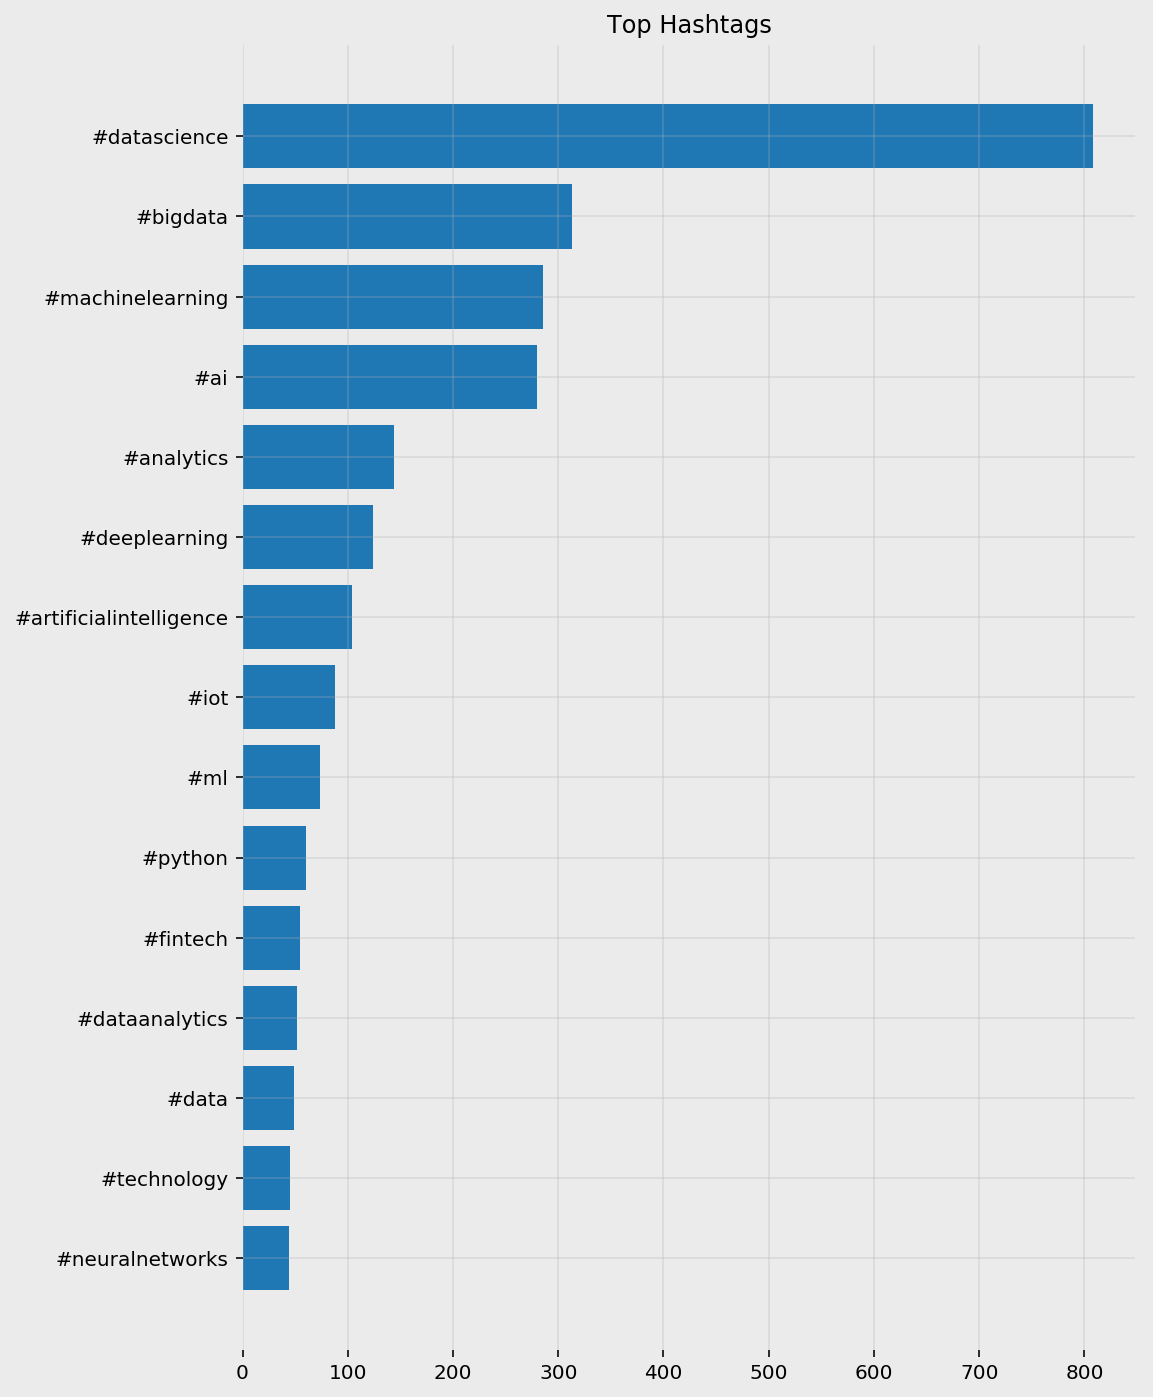

In [54]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][0:15]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][0:15]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.3)
plt.gca().set_frame_on(False)

In [56]:
sorted(hashtag_summary1) == sorted(hashtag_summary3) #check whether list contains same value or not

True

# <p style="text-align: center;">Conclusion<p><a id='Conclusion'></a>
DataScience, AI, ML were the hashtags that we put in for scraping
As we can see from the graph above AI, ML, machinelearning, bigdata were the
[Back to top](#Introduction)

We conclude this notebook with Metadata collection
Click on the link below to go to our next notebook, to see how we use this metadata for data collection and how we apply various algorithms on the same.

[After Metadata](After_Metadata_GIT.ipynb)

# <p style="text-align: center;">Contribution<p><a id='Contribution'></a>

    
- Code by self : 65%
- Code from external Sources : 35%

[Back to top](#Introduction)

# <p style="text-align: center;">Citations:<p><a id='Citation'></a>
1. https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/code/preprocess.py
2. https://stackoverflow.com/questions/8282553/removing-character-in-list-of-strings
3. https://github.com/bear/python-twitter/blob/master/twitter/parse_tweet.py
4. https://gist.github.com/dreikanter/2787146
5. https://docs.python.org/3.4/howto/unicode.html
6. https://www.kaggle.com/eliasdabbas/extract-entities-from-social-media-posts

[Back to top](#Introduction)

# <p style="text-align: center;">License<p><a id='License'></a>
Copyright (c) 2019 Rushabh Nisher, Manali Sharma

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

[Back to top](#Introduction)